<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Insight:-Numeric-variables-have-different-scales,-so-we-need-to-use-feature-scaling-methods-before-building-a-model." data-toc-modified-id="Insight:-Numeric-variables-have-different-scales,-so-we-need-to-use-feature-scaling-methods-before-building-a-model.-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Insight: Numeric variables have different scales, so we need to use feature scaling methods before building a model.</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Target-variable" data-toc-modified-id="Target-variable-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Target variable</a></span><ul class="toc-item"><li><span><a href="#Insight:-need-to-use-oversampling-or-undersampling-methods-for-this-dataset." data-toc-modified-id="Insight:-need-to-use-oversampling-or-undersampling-methods-for-this-dataset.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Insight: need to use oversampling or undersampling methods for this dataset.</a></span></li></ul></li><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Numerical variables</a></span><ul class="toc-item"><li><span><a href="#Insight:-Deal-with-outliers-(age,-duration,-campaign)" data-toc-modified-id="Insight:-Deal-with-outliers-(age,-duration,-campaign)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Insight: Deal with outliers (age, duration, campaign)</a></span></li><li><span><a href="#Insight:-pdays---change-this-to-categorical-variable-(&lt;-one-week,-&lt;-two-weeks,-&gt;-two-weeks)-or-deal-with-rare-lables." data-toc-modified-id="Insight:-pdays---change-this-to-categorical-variable-(<-one-week,-<-two-weeks,->-two-weeks)-or-deal-with-rare-lables.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Insight: pdays - change this to categorical variable (&lt; one week, &lt; two weeks, &gt; two weeks) or deal with rare lables.</a></span></li></ul></li><li><span><a href="#Feature-engineering-for-Numerical-variables" data-toc-modified-id="Feature-engineering-for-Numerical-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature engineering for Numerical variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></div>

# Bank Marketing_UCI

The dataset is provided by [UCI-Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data contains direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be 'yes' or 'no' subscribed. The main goal of this project is to predict if the client will subscribe a term deposit (variable y). 

- Reference: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


Here is the attribute information:

- Independent variables:
- 1) bank client data:
    - 1 - age (numeric)
    - 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    - 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    - 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    - 5 - default: has credit in default? (categorical: 'no','yes','unknown')
    - 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    - 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

- 2) related with the last contact of the current campaign:
    - 8 - contact: contact communication type (categorical: 'cellular','telephone')
    - 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    - 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- 3) other attributes:
    - 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    - 14 - previous: number of contacts performed before this campaign and for this client (numeric)
    - 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- 4) social and economic context attributes
    - 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    - 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    - 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    - 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    - 20 - nr.employed: number of employees - quarterly indicator (numeric)

- Dependent variable (desired target):
    - 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### Load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/BankMarketing'

In [3]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/BankMarketing')

In [4]:
data = pd.read_csv(path/'bank.csv', delimiter=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.shape

(41188, 21)

Let's take a look at basic information on dataset

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Insight: Numeric variables have different scales, so we need to use feature scaling methods before building a model. 

Let's check if we have missing data. 

In [8]:
# missing data
[var for var in data.columns if data[var].isnull().sum() > 0]

[]

There is no missing data. 

Let's create two lists for categorical variable and numerical variable for later exploration.

In [9]:
# data dtypes
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
# target variable
target = 'y'

# categorical variables
cat_vars = [var for var in data.columns if var != 'y' and data[var].dtype=='O']

# numerical variables
num_vars = [var for var in data.columns if var != 'y' and var not in cat_vars]

print('There are {} categorical variables'.format(len(cat_vars)))
print('There are {} numerical variables'.format(len(num_vars)))

There are 10 categorical variables
There are 10 numerical variables


## Data Exploration

In this section, I will explore the data. 

### Target variable

We have a classification problem and the target is binary variable (yes/no). Let's see the percentage of the value distribution of target. 

In [11]:
# target variable
# this is imbalanced data.. 

(data[target].value_counts()) / len(data)

no     0.887346
yes    0.112654
Name: y, dtype: float64

We can see that this dataset is imbalanced. About 89% of the data has 'no' answer. This can be a problem because most machine learning algorithms assume balanced distributions. As the minority examples (here 'yes' answer) occur rarely, it is hard to find (or predict) small classes. Samples from the minority class are most often misclassified. Therefore, we need to deal with this imbalanced dataset carefully. 

#### Insight: need to use oversampling or undersampling methods for this dataset. 

### Numerical variables

We have 10 numerical variables. We can have discrete variables and continuous variables. 

In [12]:
# create continous and discrete variable lists 
continous = []
discrete = []
for num in num_vars:
    if data[num].nunique() < 10:
        discrete.append(num)
    else: 
        continous.append(num)
        
print('There are {} continous variables'.format(len(continous)))
print('The continous variables are: {}'.format(continous))
print('')
print('There are {} discrete variables'.format(len(discrete)))
print('The discrete variable is: {}'.format(discrete))

There are 9 continous variables
The continous variables are: ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

There are 1 discrete variables
The discrete variable is: ['previous']


Except for `previous`, other 9 variables are continous variables. 

Let's see the distribution of continous variables and figure out it they have outliers. 

In [13]:
def plot_nums(df, variable):
    """ Function to visualize histogram, q-q plot and box plot for continous variables"""
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1,3,1)
    df[variable].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable], plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

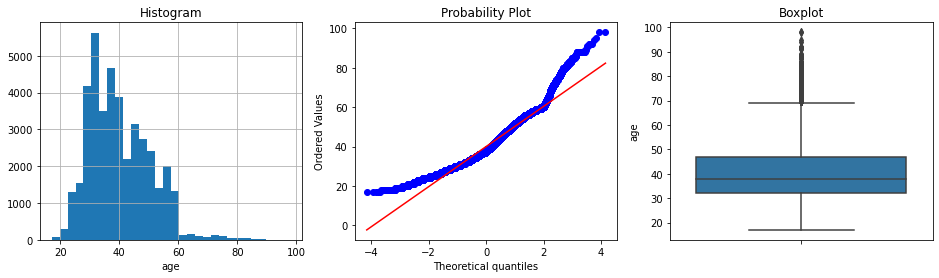

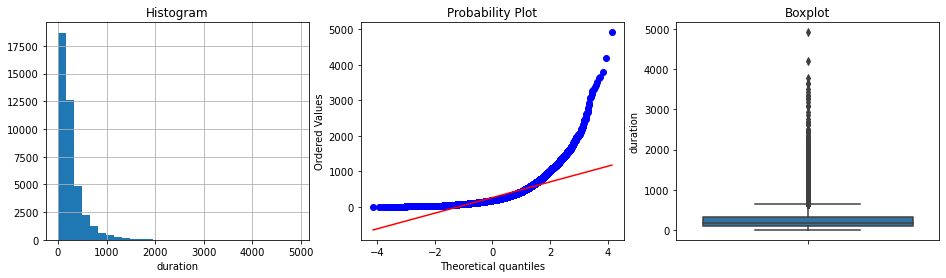

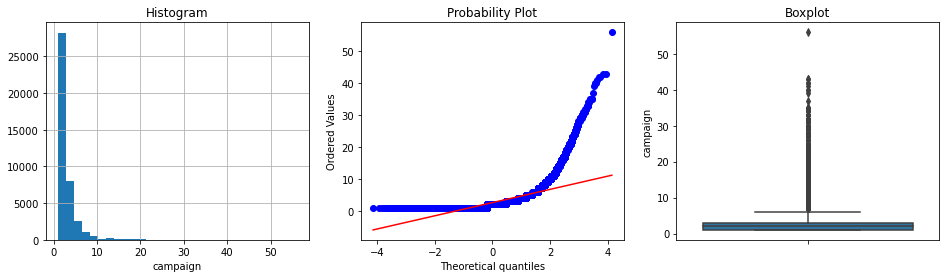

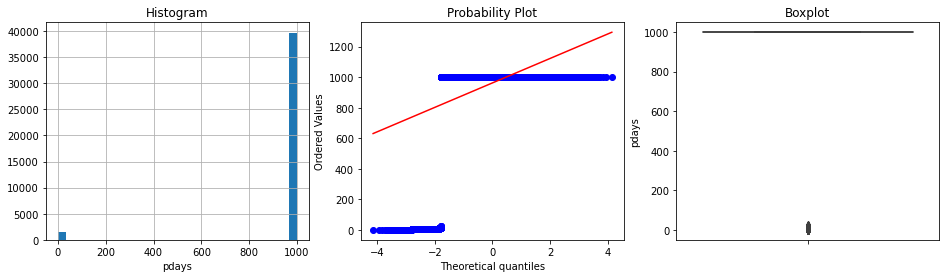

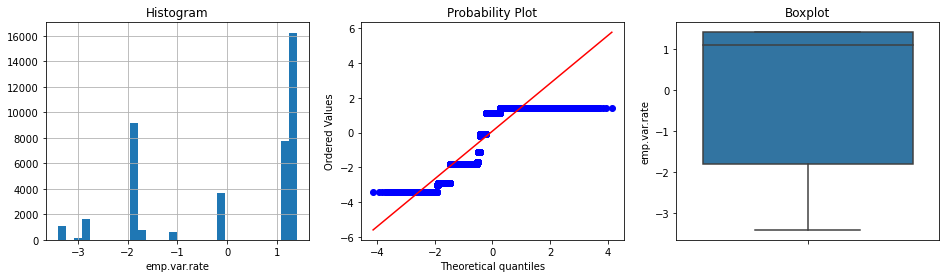

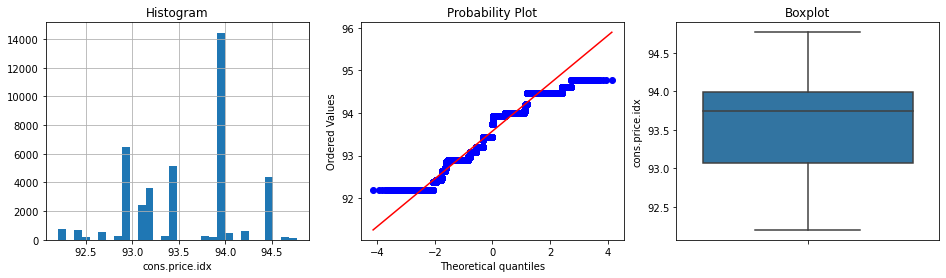

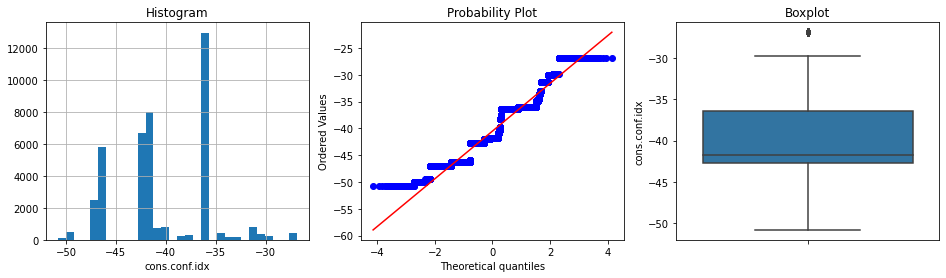

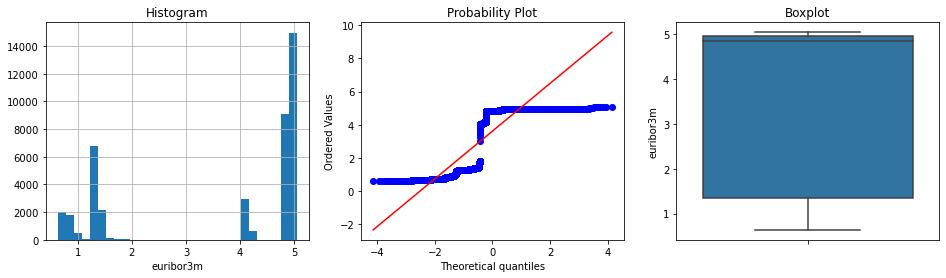

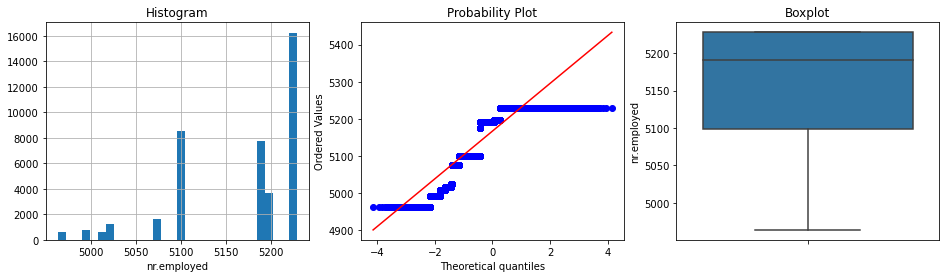

In [14]:
for var in continous:
    plot_nums(data, var)

- Normal distribution? 
    - There are no gaussian distribution. 
    
- Outliers?
    - `age`: we can make age as a categorical variable to handle with outliers. 
    - `duration`: There are values which are more than 4000. 
    - `campaign`: There are values which are more than 50. 
    
#### Insight: Deal with outliers (age, duration, campaign)

There are only 2 values in duration which are more than 4000. Also, there is only 1 value in campaign which is more than 50. So, I will drop those outliers from the dataset.

In [15]:
len(data[data['duration']>4000])

2

In [16]:
len(data[data['campaign']>50])

1

In [17]:
data = data[data['duration']<4000]
data = data[data['campaign']<50]

data.shape

(41185, 21)

Based on the attribute information above, `pdays` has 999 values which mean that client was not previous contacted. I will change 999 to -1 and see the distribution again. 

In [18]:
data['pdays'] = data['pdays'].replace(999, -1)

In [19]:
data['pdays'].unique()

array([-1,  6,  4,  3,  5,  1,  0, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15,
       16, 21, 17, 18, 22, 25, 26, 19, 27, 20])

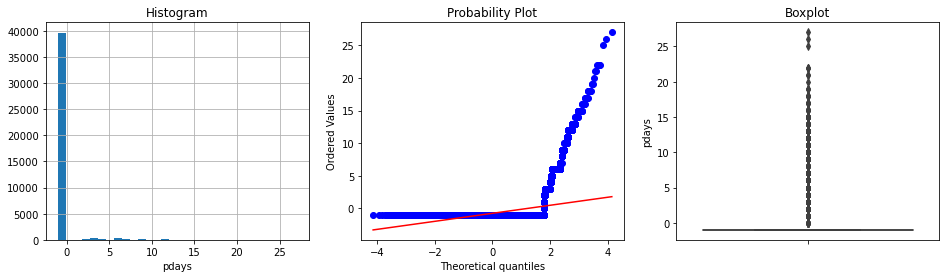

In [20]:
plot_nums(data, 'pdays')

In [21]:
data['pdays'].value_counts().sort_values(ascending=False)

-1     39670
 3       439
 6       412
 4       118
 9        64
 2        61
 7        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 19        3
 22        3
 21        2
 20        1
 25        1
 26        1
 27        1
Name: pdays, dtype: int64

`pdays` could be discrete variable, and we can see there are very few values which have more than 16 days. 

#### Insight: pdays - change this to categorical variable (< one week, < two weeks, > two weeks) or deal with rare lables. 

### Feature engineering for Numerical variables

In this section, I will engineer `age`, `pdays` as follows:

- `age`: make it as a categorical variable
   - 17-30 for young adult, 31-40, 41-50, 51-60, and more than 61
- `pdays`: make it as a categorical variable
   - 1w (less then 7days), 2w (less than 14 days), and >2w (more than 14days)

In [22]:
data['age'].min(), data['age'].max()

(17, 98)

In [23]:
# let's divide age into the buckets 
buckets = [16, 30, 40, 50, 60, 100]

# bucket labels
labels = ['17-30', '31-40', '41-50', '51-60', '>60']


# discretization
data['age_group'] = pd.cut(data['age'], bins=buckets, labels=labels, include_lowest=True)

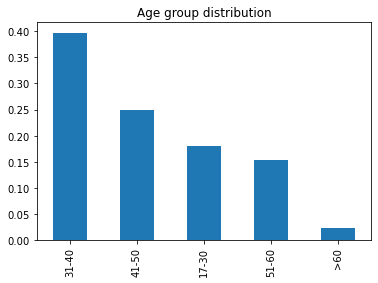

In [24]:
# Let's see the distribution of age_group
(data['age_group'].value_counts() / len(data)).plot.bar()
plt.title('Age group distribution');

In [25]:
# now we can drop age (original numberical variable)
data.drop(['age'], axis=1, inplace=True)

`pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [26]:
# Let's divide pdays into 3 groups
buckets = [0, 7, 14, 30]
labels = ['1w', '2w', '>2w']
data['pdays_group'] = pd.cut(data['pdays'], bins=buckets, labels=labels, include_lowest=False)

In [27]:
data['pdays_group'].isnull().mean()

0.9635789729270365

In [28]:
data['pdays_group'] = data['pdays_group'].astype('O')
data['pdays_group'].fillna('Not contacted', inplace=True)

In [29]:
data['pdays_group'].value_counts() / len(data)

Not contacted    0.963579
1w               0.028214
2w               0.006701
>2w              0.001505
Name: pdays_group, dtype: float64

In [30]:
# now we can drop pdays (original variable)
data.drop('pdays', axis=1, inplace=True)

### Categorical variables

We have 10 categorical variables. Let's see each variable and if we have rare labels

In [31]:
# cardinality
for var in cat_vars:
    print(var, 'has {} labels'.format(data[var].nunique()))

job has 12 labels
marital has 4 labels
education has 8 labels
default has 3 labels
housing has 3 labels
loan has 3 labels
contact has 2 labels
month has 10 labels
day_of_week has 5 labels
poutcome has 3 labels


In [34]:
# rare labels?
for var in cat_vars:
    print(var, '{} labels'.format(data[var].nunique()))
    print((data[var].value_counts() / len(data)).sort_values(ascending=False))
    print()


job 12 labels
admin.           0.253029
blue-collar      0.224669
technician       0.163700
services         0.096370
management       0.070997
retired          0.041763
entrepreneur     0.035353
self-employed    0.034503
housemaid        0.025738
unemployed       0.024621
student          0.021246
unknown          0.008013
Name: job, dtype: float64

marital 4 labels
married     0.605220
single      0.280855
divorced    0.111983
unknown     0.001942
Name: marital, dtype: float64

education 8 labels
university.degree      0.295423
high.school            0.231031
basic.9y               0.146777
professional.course    0.127279
basic.4y               0.101372
basic.6y               0.055651
unknown                0.042030
illiterate             0.000437
Name: education, dtype: float64

default 3 labels
no         0.791210
unknown    0.208717
yes        0.000073
Name: default, dtype: float64

housing 3 labels
yes        0.523856
no         0.452131
unknown    0.024014
Name: housing, dtype: 

- job has 12 labels but 6 labels are less than 0.05, and unknown should be missing value
- martial has unknown value
- education has 1 rare label but we don't need to encode for this, and it has unknown
- default has imbalanced (yes-0.000073) and it has unknown
- housing has unknown value
- loan has unknown
- month has 4 rare labels
- poutcome has 1 rare label but we don't need to encode for this


- __Conclusion:__ Even though we have some rare labels in categorical variables, I won't perform rare label feature engineering here given the attribute information. However, we need to see the distribution when we split train and test data. 

## Data Visualization

- split train and test data
- resampling
- Feature engineering
- Feature selection
- build models!


In this section, I will create some graphs to compare 'yes'-group to 'no'-group based on y variable. If we see differences between groups, the variables will be important to build the models.  

In [35]:
test

NameError: name 'test' is not defined